# Exploratory Data Analysis (EDA) for ANIMAL NER Dataset

## Dataset Creation
The dataset was created manually to ensure full control over data quality and structure.
Sentences containing various animal names were generated using LLMs to provide linguistic diversity and natural phrasing.
Each sentence was then manually annotated to mark the spans of animal entities according to the spaCy JSON format.

In [1]:
import json
import pandas as pd

## Loading and Previewing the Dataset

In [2]:
# Load dataset
with open("data_for_ner/train.json", "r") as f:
    data = json.load(f)

# Convert into a DataFrame for convenience
df = pd.DataFrame([
    {"text": item["text"], "entities": item["entities"]}
    for item in data
])

df.head()

,text,entities
0,I saw a chimpanzee climbing a tree.,"[[8, 18, ANIMAL]]"
1,The chimpanzee was eating bananas.,"[[4, 14, ANIMAL]]"
2,Chimpanzees are intelligent animals.,"[[0, 11, ANIMAL]]"
3,A group of chimpanzees was making loud noises.,"[[11, 22, ANIMAL]]"
4,I watched a documentary about chimpanzees.,"[[30, 41, ANIMAL]]"


## Basic Dataset Overview

In [3]:
print(f"Total number of sentences: {len(df)}")
df["num_entities"] = df["entities"].apply(len)
print(f"Average number of entities per sentence: {df['num_entities'].mean():.2f}")

print("\nDistribution of entity counts per sentence:")
print(df["num_entities"].value_counts())

Total number of sentences: 145
Average number of entities per sentence: 0.72

Distribution of entity counts per sentence:
num_entities
1    105
0     40
Name: count, dtype: int64


## Extracting and Analyzing Entity Spans

In [10]:
from collections import Counter

# Extract entity texts
entities_list = []
for item in data:
    text = item["text"]
    for start, end, label in item["entities"]:
        entities_list.append(text[start:end])

entities_counter = Counter(entities_list)
print(f"Total number of entities: {len(entities_list)}")
print("\nTop 10 most common animal mentions:")
for animal, count in entities_counter.most_common(10):
    print(f"{animal}: {count}")


Total number of entities: 105

All animal mentions and counts:
deer: 8
coyote: 7
duck: 7
eagle: 7
hedgehog: 7
rhinoceros: 7
tiger: 7
elephant: 6
hippopotamus: 6
kangaroo: 6
chimpanzee: 4


## Visualizing the Most Frequent Animals

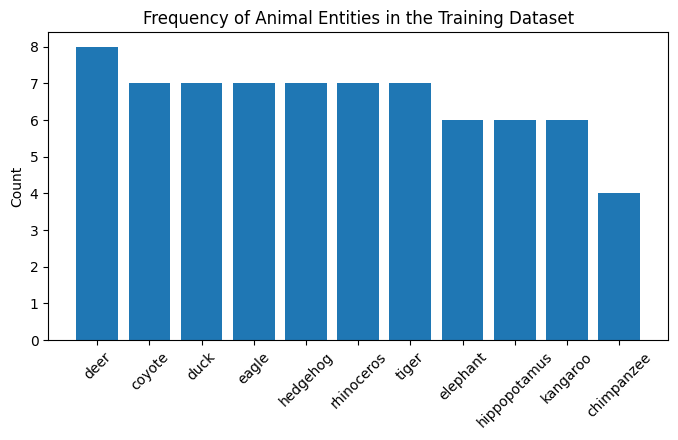

In [12]:
import matplotlib.pyplot as plt

top_animals = dict(entities_counter.most_common(11))
plt.figure(figsize=(8, 4))
plt.bar(top_animals.keys(), top_animals.values())
plt.title("Frequency of Animal Entities in the Training Dataset")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Sentence and Entity Length Analysis

Average sentence length: 35.5 characters
Average entity length: 7.5 characters


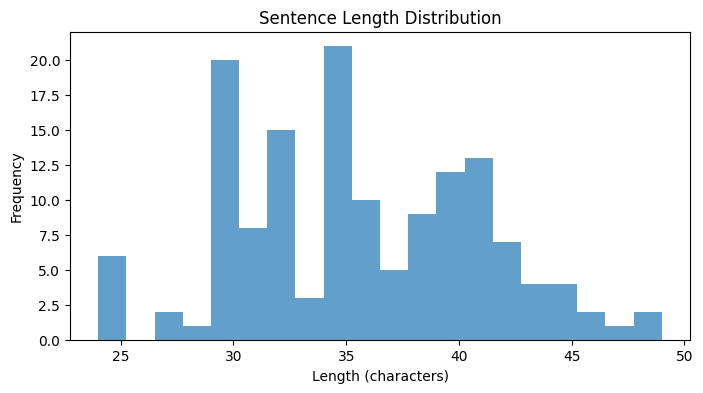

In [6]:
df["text_length"] = df["text"].apply(len)
entity_lengths = [end - start for item in data for (start, end, _) in item["entities"]]

print(f"Average sentence length: {df['text_length'].mean():.1f} characters")
print(f"Average entity length: {sum(entity_lengths) / len(entity_lengths):.1f} characters")

plt.figure(figsize=(8,4))
plt.hist(df["text_length"], bins=20, alpha=0.7)
plt.title("Sentence Length Distribution")
plt.xlabel("Length (characters)")
plt.ylabel("Frequency")
plt.show()

## Checking Annotation Consistency

In [7]:
def verify_annotation(item):
    text = item["text"]
    for start, end, label in item["entities"]:
        substring = text[start:end]
        if not substring.strip():
            return False
    return True

valid_annotations = [verify_annotation(item) for item in data]
print(f"Valid annotations: {sum(valid_annotations)}/{len(valid_annotations)}")

Valid annotations: 145/145


## Word Cloud of the Dataset

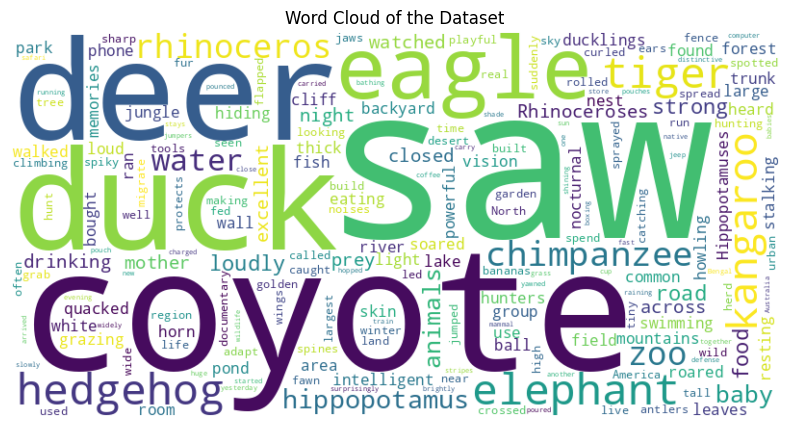

In [8]:
from wordcloud import WordCloud

all_text = " ".join(df["text"])
wc = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of the Dataset")
plt.show()